In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_dir='/content/drive/MyDrive/fish_identify'
img_width, img_height=128,128
batch_size=32
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width, img_height,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(2,activation='softmax')
])

Found 361 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
history=model.fit(train_generator,epochs=150)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6708 - loss: 0.9460
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7782 - loss: 0.3508
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8661 - loss: 0.2396
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8830 - loss: 0.2426
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8808 - loss: 0.2719
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9052 - loss: 0.2306
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8958 - loss: 0.1922
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9061 - loss: 0.2022
Epoch 9/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9254 - loss: 0.1506
Epoch 10/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9068 - loss: 0.1588
Epoch 11/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8910 - loss: 0.2037
Epoch 12/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy:

In [6]:
model.save('term_cnn.keras')

In [7]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('term_cnn.keras')

# Check the model summary to verify it loaded correctly
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,914,696 (37.82 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,798 (25.21 MB)

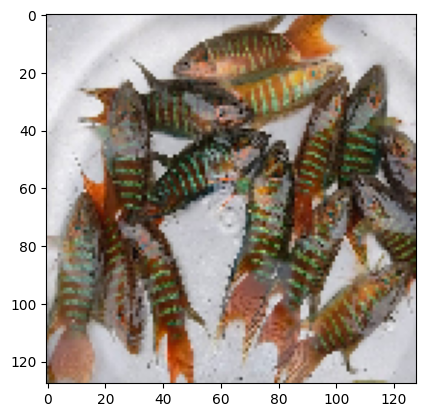

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Loài cá: Cá khác


In [28]:
from matplotlib import pyplot as plt
from keras.utils import load_img
import numpy as np
path = '/content/Loai-ca-o-que-co-the-xin-len-thanh-pho-gia-len-den-5000-dong-con-430662831_2632797010217694_8480875570765260451_n-1710307060-46-width912height769.jpg'
# Tiên đoán loại s
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img = np.array(img)
img = img / 255.0
img = img.reshape(1, 128, 128, 3)
prediction=np.argmax(model.predict(img))
#Ánh xạ loại tới tên người
class_labels = {v: k for k, v in train_generator.class_indices.items()}
Fish = class_labels[prediction]
print(f'Loài cá: {Fish}')